In [1]:
!pip install datasets


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from datasets import load_dataset

In [44]:
imagenet_dataset = load_dataset("barkermrl/imagenet-a")

In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [4]:
!pip3 install contrastive


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
from sklearn.decomposition import PCA
from contrastive import CPCA

In [10]:
!pip install keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 19.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 61.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 80.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.6 MB/s eta 0:00:00


In [42]:
from datasets import load_dataset
import numpy as np
from pprint import pprint

mnist_dataset = load_dataset("mnist")

train_X = []
train_y = []
for i in range(10000):
    train_X.append(np.asarray(mnist_dataset["train"][i]["image"]))
    train_y.append(mnist_dataset["train"][i]["label"])
train_X = np.asarray(train_X)
train_y = np.asarray(train_y)

In [35]:
print(mnist_dataset)
# pprint(np.asarray(mnist_dataset["train"][0]["image"]))

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [84]:
target_idx = np.where(train_y < 2)[0]
foreground = train_X[target_idx, :][:100]
target_labels = train_y[target_idx][:100]

In [86]:
foreground = foreground.reshape((100, 784))
foreground = foreground / 255  # Scale images
print(f"Size of MNIST dataset: {len(foreground)}")

Size of MNIST dataset: 100


In [89]:
from PIL import Image
import os

# IMAGE_PATH = '/content/gan-getting-started/photo_jpg' #Replace with your own path to downloaded images
natural_images = list()
for i in range(100):
    im = imagenet_dataset["train"][0]["image"]
    # im = Image.open(os.path.join(IMAGE_PATH,filename))
    im = im.convert("L")  # convert to grayscale\
    width, height = im.size
    left = (width - 100) / 2
    top = (height - 100) / 2
    right = (width + 100) / 2
    bottom = (height + 100) / 2
    img_crop = im.crop(
        (left, top, right, bottom)
    )  # resize and crop each picture to be 100px by 100px
    # natural_images.append(np.reshape(img_crop, [10000]))
    img_array = np.array(img_crop)
    natural_images.append(img_array)
natural_images = np.asarray(natural_images, dtype=float)
natural_images = natural_images.reshape((100, 10000))
natural_images /= 255  # rescale to be 0-1
print("Array of Imagenet-a images:", natural_images.shape)

Array of Imagenet-a images: (100, 10000)


In [90]:
np.random.seed(0)  # for reproducibility

rand_indices = np.random.permutation(
    natural_images.shape[0]
)  # just shuffles the indices
split = int(len(rand_indices) / 2)
target_indices = rand_indices[
    0:split
]  # choose the first half of images to be superimposed on target
background_indices = rand_indices[
    split:
]  # choose the second half of images to be background dataset

target = np.zeros(foreground.shape)
background = np.zeros(foreground.shape)

for i in range(target.shape[0]):
    idx = np.random.choice(target_indices)  # randomly pick a image
    loc = np.random.randint(70, size=(2))  # randomly pick a region in the image
    superimposed_patch = np.reshape(
        np.reshape(natural_images[idx, :], [100, 100])[loc[0] : loc[0] + 28, :][
            :, loc[1] : loc[1] + 28
        ],
        [1, 784],
    )
    target[i] = 0.25 * (foreground[i]) + superimposed_patch

    idx = np.random.choice(background_indices)  # randomly pick a image
    loc = np.random.randint(70, size=(2))  # randomly pick a region in the image
    background_patch = np.reshape(
        np.reshape(natural_images[idx, :], [100, 100])[loc[0] : loc[0] + 28, :][
            :, loc[1] : loc[1] + 28
        ],
        [1, 784],
    )
    background[i] = background_patch

In [91]:
target.shape

(100, 784)

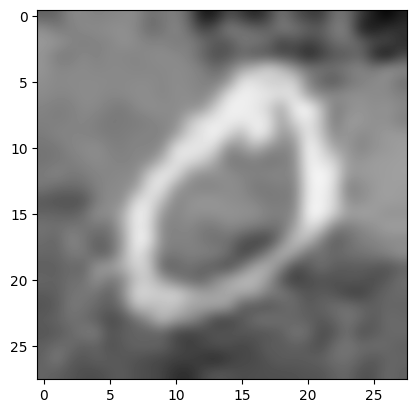

In [98]:
plt.imshow(target[0].reshape((28, 28)), cmap="gray", interpolation="bicubic")

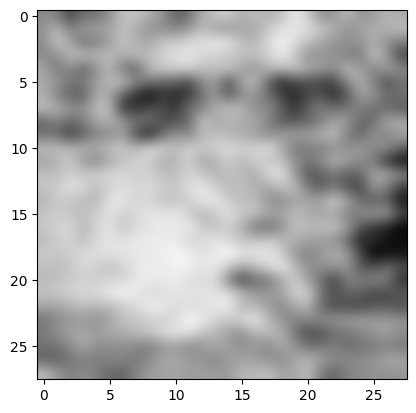

In [93]:
plt.imshow(background[0].reshape((28, 28)), cmap="gray", interpolation="bicubic")

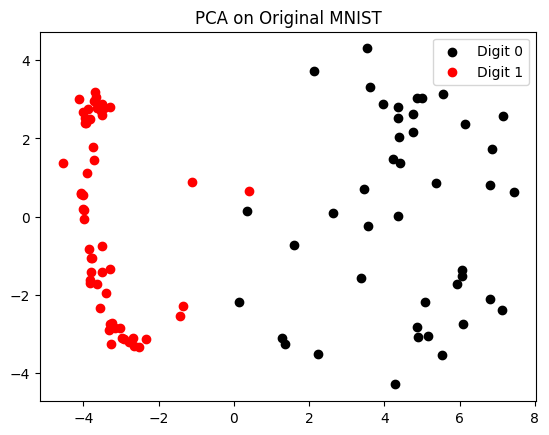

In [97]:
pca = PCA(n_components=2)
fg = pca.fit_transform(foreground)
colors = ["k", "r"]

for i, l in enumerate(np.sort(np.unique(target_labels))):
    plt.scatter(
        fg[np.where(target_labels == l), 0],
        fg[np.where(target_labels == l), 1],
        color=colors[i],
        label="Digit " + str(l),
    )
plt.title("PCA on Original MNIST")
plt.legend()

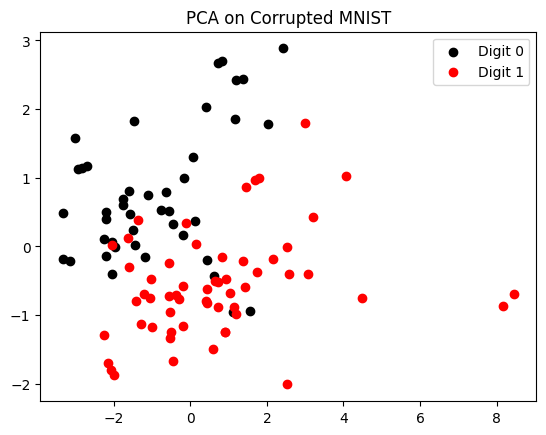

In [95]:
pca = PCA(n_components=2)
fg = pca.fit_transform(target)

for i, l in enumerate(np.sort(np.unique(target_labels))):
    plt.scatter(
        fg[np.where(target_labels == l), 0],
        fg[np.where(target_labels == l), 1],
        color=colors[i],
        label="Digit " + str(l),
    )
plt.legend()
plt.title("PCA on Corrupted MNIST")
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


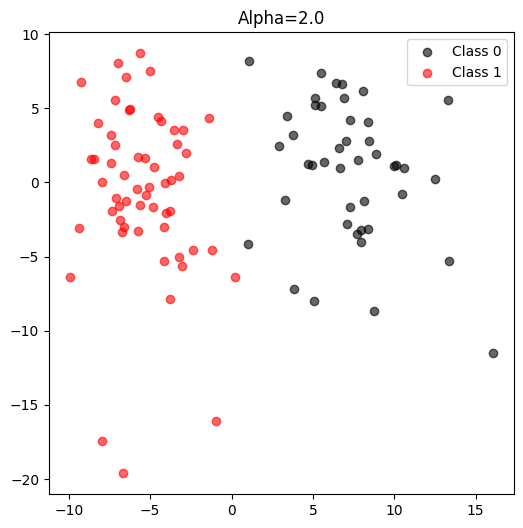

In [96]:
projected_data = mdl.fit_transform(
    target,
    background,
    plot=True,
    active_labels=target_labels,
    alpha_value=2.0,
    alpha_selection="manual",
)

In [ ]:
mdl = CPCA()
projected_data = mdl.fit_transform(
    target, background, plot=True, active_labels=target_labels
)

In [11]:
from huggingface_hub import login

login()

In [12]:
dataset = load_dataset("imagenet-1k")

GatedRepoError: 403 Client Error. (Request ID: Root=1-65a81fc9-3e7e1d996f4118dc7ea93db5;3e719145-9f79-46ef-acd4-248eb329ed00)

Cannot access gated repo for url https://huggingface.co/api/datasets/imagenet-1k.
Access to dataset imagenet-1k is restricted and you are not in the authorized list. Visit https://huggingface.co/datasets/imagenet-1k to ask for access.